Bucks Points Mean  118.62121212121212
Bucks Points SD  11.693213220977178
Clippers Points Mean  116.5
Clippers Points SD  14.180430719291124
MIL Win  0.7142857142857143 %
LAC Win  0.2857142857142857 %
Tie  0.0 %


[-1, 1, 1, -1, 1, 1, 1]

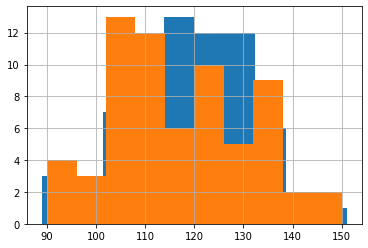

In [52]:
# NBAPlayoffs2020.py
# This program will import the statistics of every team
# During the 2019-2020 NBA season
# Then will use these statistics to simulate a game between two teams 
# That can be used to simulate the entire 2020 NBA postseason
# Use of NBA data permitted by fair use, being for educational purposes
# Seth Grieser 
# SES350 Final Project

import numpy as np
import pandas as pd 
import random as rnd 
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize 
from scipy import ndimage
from pylab import *
from scipy.integrate import odeint

gdf = pd.read_csv('nba2020.csv')                           # Read in NBA 2019-2020 Regular Season statistics 
gdf.columns                                                # Sort excel data by columns 



mil = gdf[gdf.Team == 'MIL']                                # Assigns mil for Bucks Team Data 
lac = gdf[gdf.Team == 'LAC']                                # Same, but lac for Clippers Team Data


mil.Pts.hist()                                              # Creates a histogram of Lakers PPG vs. Mem PPG 
lac.Pts.hist()                                              # By amount of games it occurs for each team
milmeanpts = mil.Pts.mean()                                 # Mean of PPG for each team
lacmeanpts = lac.Pts.mean()
milpts = mil.Pts.std()                                      # SD of PPG for each team
lacpts = lac.Pts.std()

rnd.gauss(110, 15)                                         # Assigns random gaussian distribtion of 110 PPG
                                                           # And a SD of 15 points, roughly league averages 


print("Bucks Points Mean ", milmeanpts)
print("Bucks Points SD ", milpts)
print("Clippers Points Mean ", lacmeanpts)
print("Clippers Points SD ", lacpts)



def gameSim():                                           # Simulates a game based on MIL PPG vs. LAC PPG
    MILScore = (rnd.gauss(milmeanpts,milpts)) 
    LACScore = (rnd.gauss(lacmeanpts,lacpts))            # Uses the random gaussian distribution
    if int(round(MILScore)) > int(round(LACScore)):
        return 1
    elif int(round(MILScore)) < int(round(LACScore)):
        return -1
    else: return 0

def gamesSim(ns):                                       # Assigns one team wins, and other loses 
    gamesout = []
    team1win = 0
    team2win = 0
    tie = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
        else: tie +=1 
    print('MIL Win ', team1win/(team1win+team2win+tie),'%')
    print('LAC Win ', team2win/(team1win+team2win+tie),'%')
    print('Tie ', tie/(team1win+team2win+tie), '%')
    return gamesout

gamesSim(7)                                             # Simulates 7 games 